In [86]:
import numpy as np
import matplotlib.pyplot as plt

1. Implement a function draw_observation that given a matrix A and a vector x0, outputs a realization of the random variable Ax0 +w, where w is a standard Gaussian.

In [87]:
def draw_observation(A, x0):
    """
    A : matrix, shape(n,d)
    x0: vector, shape(d,)
    output: Ax0 + w, shape(n,1)
    (w ~ standard Gaussian)
    """
    w = np.random.normal(size=(A.shape[0], 1))
    return np.dot(A, x0) + w

2. Implement a function prediction_error that given A, x0 , x outputs the square prediction error 1/n · ∥Ax − Ax0∥2.

In [88]:
def prediction_error(A, x0, x):
    """
    """
    error_matrix = np.dot(A, x) - np.dot(A, x0)
    error = np.linalg.norm(error_matrix, ord=2) ** 2 / A.shape[0]
    return error

3. Implement a function loglikelihood that given A,x,y outputs the (scaled) log likelihood 1/n · ∥Ax − y∥2.

In [89]:
def loglikelihood(A, x, y):
    """
    """
    likelihood_matrix = np.dot(A, x) - y
    log_likelihood = np.linalg.norm(likelihood_matrix, ord=2) ** 2 / A.shape[0]
    return log_likelihood

4.Implement a function gradient that given A, x, y outputs the gradient of the above log likelihood function with respect to x

In [90]:
def gradient(A, x, y):
    """
    """
    # log_likelihood = loglikelihood(A, x, y) = 1/n · ∥Ax − y∥2 = 1/n * [||Ax||2 - x.T*A.T*y - y.T*A*x + ||y||2]
    # result should be: 1/n * (A.T*A*x + A.T*A*x- A.T*y - A.T*y)
    return (A.T.dot(A).dot(x)*2 - A.T.dot(y)*2) / A.shape[0]

5. Implement a function gradient_descent that given A,y,T,γ,xinit runs gradient descent starting at xinit for T steps with step size γ. This function should use the previous one to compute a gradient in each step. The output of the function should be an array of all T + 1 iterates that gradient descent computed.

In [91]:
def gradient_descent(A, y, T, gamma, x_init):
    output = []
    x = x_init
    for i in range(T+1):
        x_next = x - gamma * gradient(A, x, y)
        x = x_next
        output.append(x)
    return output

6. Implement a function plot_prediction that given A, x0 and a list of iterates plots the prediction errors of the iterates.

In [92]:
def plot_prediction(A, x0, list_of_iterates):
    errors = []
    for i in range(len(list_of_iterates)):
        error = prediction_error(A, x0, list_of_iterates[i])
        errors.append(error)
    plt.xlabel('iterates')
    plt.ylabel('error')
    plt.plot([i for i in range(len(list_of_iterates))], errors, label='prediction error')
    plt.legend
    plt.show

7. Implement a function plot_optimization that given A, y and a list of iterates plots the loglikelihoods of the iterates.

In [93]:
def plot_optimization(A, y, list_of_iterates):
    log_likelihoods = []
    for i in range(len(list_of_iterates)):
        likelihood = loglikelihood(A, list_of_iterates[i], y)
        log_likelihoods.append(likelihood)
    plt.xlabel('iterates')
    plt.ylabel('log likelihood')
    plt.plot([i for i in range(len(list_of_iterates))], log_likelihoods, label='optimization')
    plt.legend
    plt.show

8. Implement a function random_unit_vector that given d outputs a random unit vector. You can obtain such a vector by first choosing a $d$-dimensional standard Gaussian vector v and then scaling this vector by 1/∥v∥.

In [94]:
def random_unit_vector(d):
    """
    """
    random_vector = np.random.normal(size=(d,1))
    random_vector /= np.linalg.norm(random_vector, ord=2)
    return random_vector

9. Implement a function random_model that given d and n, outputs a matrix A and a vector x0 such that every entry of A is a standard Gaussian and x0 is a random unit vector.

In [95]:
def random_model(d, n):
    A = np.mat(np.zeros((n, d)))
    for i in range(n):
        for j in range(d):
            A[i, j] = np.random.normal(size=1)
    x0 = random_unit_vector(d)
    return A, x0

10. Conduct some experiments. Choose values of d and n. Choose a step size γ and a number of steps T. Choose A and x0 using the function random_model. Choose xinit as a random unit vector. Show the plots for the prediction error and the loglikelihoods.

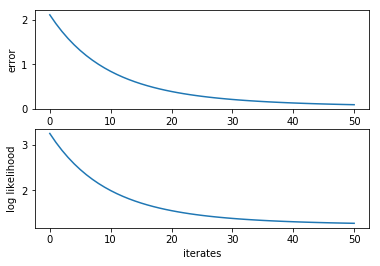

In [111]:
# parameters
d = 10
n = 100
gamma = 0.02
T = 50

# 
A, x0 = random_model(d, n)
# print(A.shape, x0.shape)
# print(np.dot(A,x0).shape)
#
x_init = random_unit_vector(d)

# draw observation
y = draw_observation(A, x0)

# compute grandient descent
output = gradient_descent(A, y, T, gamma, x_init)

# show the plots
plt.subplot(211)
plot_prediction(A, x0, output)
plt.subplot(212)
plot_optimization(A, y, output)


12. Implement a function random_sparse_model similar to random_model but adapted to sparse linear regression. This function should have the sparsity parameter k as an additional argument.

In [112]:
def  random_sparse_model(d, n, k):
    A = np.mat(np.zeros((n, d)))
    for i in range(n):
        for j in range(d):
            A[i, j] = np.random.normal(size=1)
    x0 = np.zeros((d,1))
    for i in range(x0.shape[0]):
        if np.count_nonzero(x0) <= k:
            random = np.random.rand(1)
            if random < k/d:
                x0[i] = np.random.normal(size=1)
    return A, x0